In [227]:
#Weather Forecast-Lujing Xi

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward, dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

np.random.seed(66)

In [228]:
#Section I - Data Preparation
##EDA for missing values and outliers
Weather = pd.read_csv("Weather Forecast Training.csv")
Weather.head()
Weather.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
51973,CoffsHarbour,20.1,25.8,5.6,4.4,8.2,ESE,28.0,SE,13.0,72.0,1018.9,3.0,24.7,Yes,Yes
51974,Sydney,14.2,18.6,2.8,4.0,0.0,SSE,41.0,SE,20.0,52.0,1022.3,NaN,17.2,Yes,Yes
51975,BadgerysCreek,11.1,17.2,1.2,NaN,NaN,W,31.0,W,11.0,92.0,1018.7,NaN,12.9,Yes,Yes
51976,Sydney,19.0,24.8,0.0,5.2,7.5,NaN,NaN,E,17.0,65.0,1015.4,7.0,23.4,No,No
51977,Richmond,21.6,36.2,0.0,5.6,NaN,ENE,31.0,ENE,7.0,47.0,1005.9,NaN,32.8,No,No


In [229]:
Weather.info()
Weather.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51978 non-null  object 
 1   MinTemp        51694 non-null  float64
 2   MaxTemp        51849 non-null  float64
 3   Rainfall       51231 non-null  float64
 4   Evaporation    29425 non-null  float64
 5   Sunshine       27103 non-null  float64
 6   WindGustDir    48380 non-null  object 
 7   WindGustSpeed  48407 non-null  float64
 8   WindDir        50465 non-null  object 
 9   WindSpeed      50954 non-null  float64
 10  Humidity       50549 non-null  float64
 11  Pressure       46912 non-null  float64
 12  Cloud          31848 non-null  float64
 13  Temp           50915 non-null  float64
 14  RainToday      51231 non-null  object 
 15  RainTomorrow   51978 non-null  object 
dtypes: float64(11), object(5)
memory usage: 6.3+ MB


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,51694.000000,51849.000000,51231.000000,29425.000000,27103.000000,48407.000000,50954.000000,50549.000000,46912.000000,31848.000000,50915.000000
mean,12.549174,22.512698,3.639494,5.177570,6.530580,42.003016,19.092299,57.432214,1014.273338,5.175647,20.845623
std,6.376746,7.113064,11.009628,4.017662,3.946561,14.627024,9.157505,21.833045,7.278733,2.632166,6.938471
min,-8.000000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-4.400000
25%,7.900000,17.200000,0.000000,2.400000,3.200000,31.000000,13.000000,42.000000,1009.300000,3.000000,15.700000
50%,12.300000,21.800000,0.000000,4.400000,6.900000,39.000000,19.000000,58.000000,1014.200000,6.000000,20.200000
75%,17.200000,27.500000,2.200000,7.000000,9.900000,50.000000,24.000000,73.000000,1019.200000,7.000000,25.600000
max,31.400000,47.000000,371.000000,77.300000,14.500000,135.000000,83.000000,100.000000,1037.800000,8.000000,46.100000


In [230]:
Weather.isna().sum()

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

<AxesSubplot:>

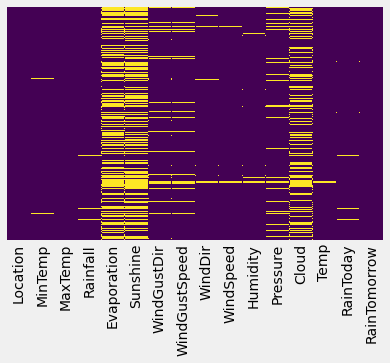

In [231]:
sns.heatmap(Weather.isnull(), cbar=False, yticklabels=False,cmap='viridis')

In [232]:
#Both the isnull summary and the heatmap show the extent of missing values among the variables. Evaporation, Sunshine, and Cloud columns have the most missing values. Imputation is needed for running the machine learning models.

In [233]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1<lower_limit:
            outliers.append(out1)
    
    return np.array(outliers)


def details(col):
    fix,(ax1,ax2) = plt.subplots(1,2,figsize=(7,5))
    sns.boxplot(col,orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title("Boxplot of {}".format(col.name))
    sns.distplot(col,ax=ax2)
    ax2.set_title("Distribution plot pf {}".format(col.name))
    
def analysis_column(col):
    print("count of outliers", len(findoutliers(col)))
    print('Mean', format(col.mean()))
    print('Median', format(col.median()))
    print('Missing Values', format(col.isnull().sum()))
    print('% of Missing Values', format(round(100*(col.isnull().sum()/len(col)),2)))
    
    details(col)

count of outliers 771
Mean 5.177570093457933
Median 4.4
Missing Values 22553
% of Missing Values 43.39


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


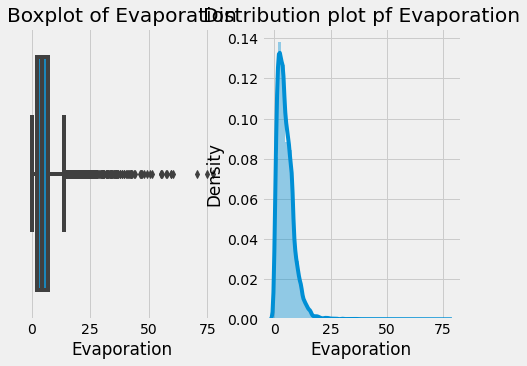

In [234]:
analysis_column(Weather.Evaporation)
#Besides having many missing values, Evaporation column has a skewed distribution with lots of outliers on the right tail. Thus, median imputation would be more suitable than mean imputation.

count of outliers 0
Mean 6.530579640630213
Median 6.9
Missing Values 24875
% of Missing Values 47.86


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


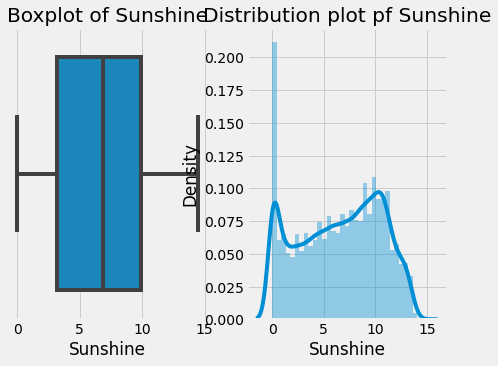

In [235]:
analysis_column(Weather.Sunshine)
#According to the reesult, there isn't any outlier, and mean imputation would be suitable for Sunshine.

count of outliers 0
Mean 5.1756468224064305
Median 6.0
Missing Values 20130
% of Missing Values 38.73


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


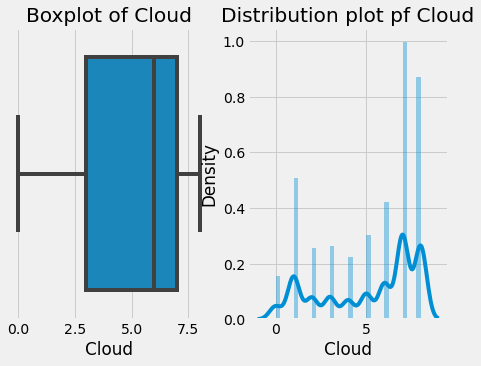

In [236]:
analysis_column(Weather.Cloud)
#Cloud variable also doesn't have any outlier, and mean imputation will be applied to the misisng values. 

count of outliers 23
Mean 12.549173985375509
Median 12.3
Missing Values 284
% of Missing Values 0.55


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


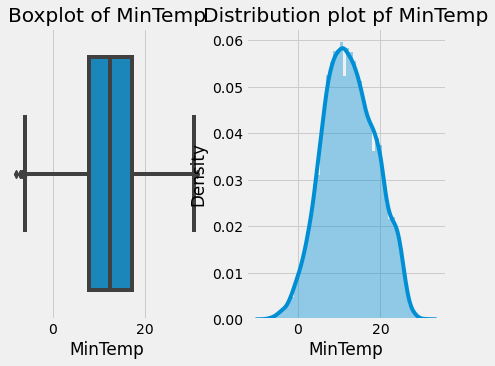

In [237]:
#The next step is to look at other numeric variables with missing values. For categorical variables, the imputation method will be "mode".

analysis_column(Weather.MinTemp)


count of outliers 206
Mean 22.512698412698487
Median 21.8
Missing Values 129
% of Missing Values 0.25


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


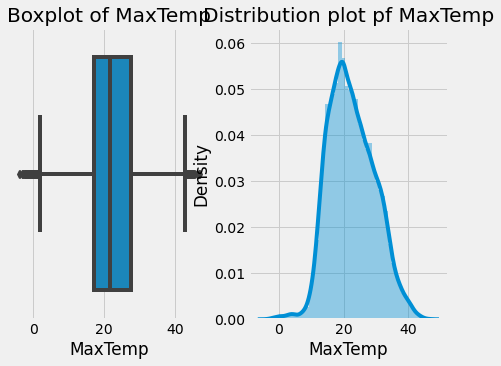

In [238]:
analysis_column(Weather.MaxTemp)


count of outliers 8291
Mean 3.6394936659445203
Median 0.0
Missing Values 747
% of Missing Values 1.44


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


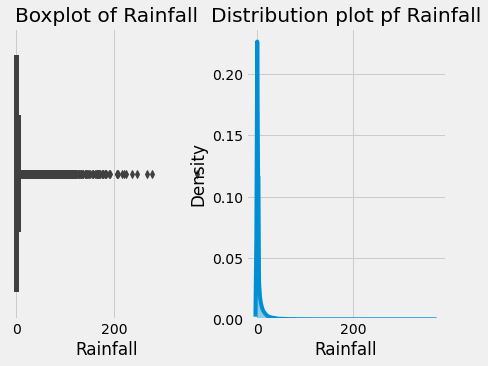

In [239]:
analysis_column(Weather.Rainfall)


count of outliers 966
Mean 42.003016092713864
Median 39.0
Missing Values 3571
% of Missing Values 6.87


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


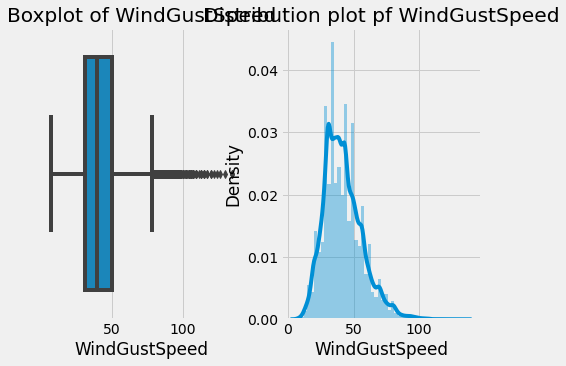

In [240]:
analysis_column(Weather.WindGustSpeed)
 


count of outliers 1143
Mean 19.09229893629548
Median 19.0
Missing Values 1024
% of Missing Values 1.97


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


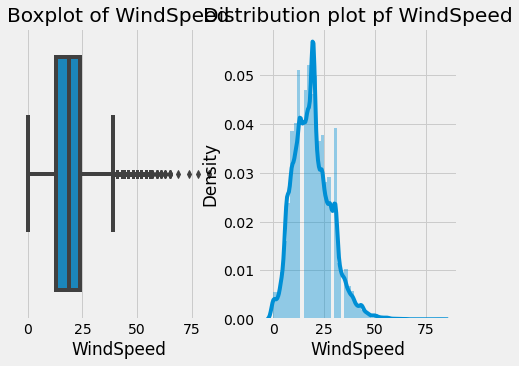

In [241]:

analysis_column(Weather.WindSpeed)


count of outliers 0
Mean 57.432214287127344
Median 58.0
Missing Values 1429
% of Missing Values 2.75


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


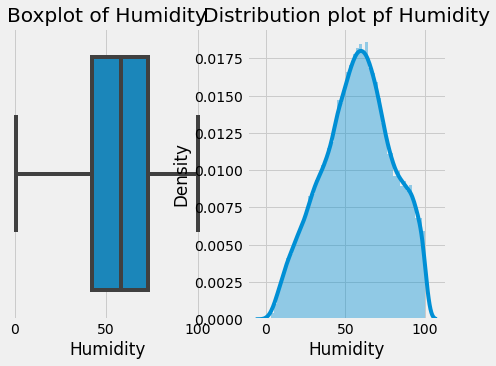

In [242]:
analysis_column(Weather.Humidity)

count of outliers 363
Mean 1014.2733379945495
Median 1014.2
Missing Values 5066
% of Missing Values 9.75


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


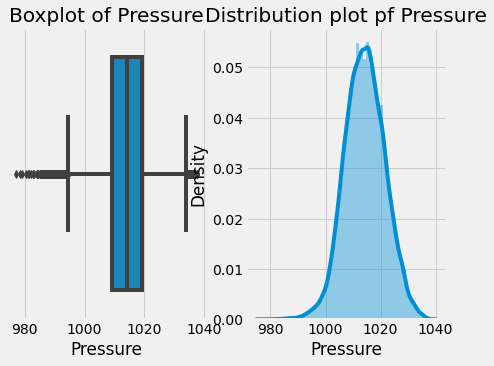

In [243]:
analysis_column(Weather.Pressure)


count of outliers 267
Mean 20.845623097318942
Median 20.2
Missing Values 1063
% of Missing Values 2.05


C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\XILUJ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


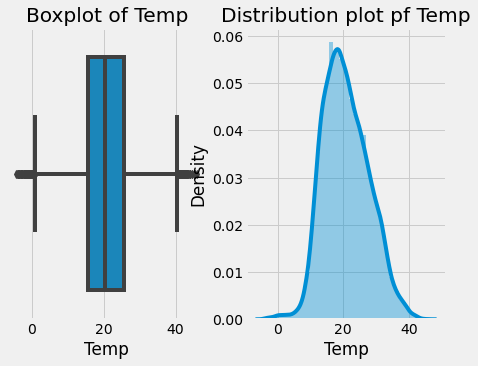

In [244]:
analysis_column(Weather.Temp)

In [245]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [246]:
Weather["Evaporation"] = median_imputer.fit_transform(Weather[["Evaporation"]]).ravel()

In [247]:
Weather["Sunshine"] = mean_imputer.fit_transform(Weather[["Sunshine"]]).ravel()

In [248]:
Weather["Cloud"] = mean_imputer.fit_transform(Weather[["Cloud"]]).ravel()

In [249]:
Weather["MinTemp"] = mean_imputer.fit_transform(Weather[["MinTemp"]]).ravel()

In [250]:
Weather["MaxTemp"] = mean_imputer.fit_transform(Weather[["MaxTemp"]]).ravel()

In [251]:
Weather["Rainfall"] = median_imputer.fit_transform(Weather[["Rainfall"]]).ravel()

In [252]:
Weather["WindGustSpeed"] = median_imputer.fit_transform(Weather[["WindGustSpeed"]]).ravel()

In [253]:
Weather["WindSpeed"] = median_imputer.fit_transform(Weather[["WindSpeed"]]).ravel()

In [254]:
Weather["Humidity"] = mean_imputer.fit_transform(Weather[["Humidity"]]).ravel()

In [255]:
Weather["Pressure"] = mean_imputer.fit_transform(Weather[["Pressure"]]).ravel()

In [256]:
Weather["Temp"] = mean_imputer.fit_transform(Weather[["Temp"]]).ravel()

In [257]:
Weather["WindGustDir"] = mode_imputer.fit_transform(Weather[["WindGustDir"]]).ravel()

In [258]:
Weather["WindDir"] = mode_imputer.fit_transform(Weather[["WindDir"]]).ravel()

In [259]:
Weather.isna().sum()
#After imputation, the NA summary looks clear. We have no NA besides the RainToday boolean variable. We could not impute the NAs for RainToday, so we will delete those 747 rows.  

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir            0
WindSpeed          0
Humidity           0
Pressure           0
Cloud              0
Temp               0
RainToday        747
RainTomorrow       0
dtype: int64

In [260]:
Weather2 = Weather.dropna()

In [261]:
Weather2.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir          0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
RainToday        0
RainTomorrow     0
dtype: int64

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

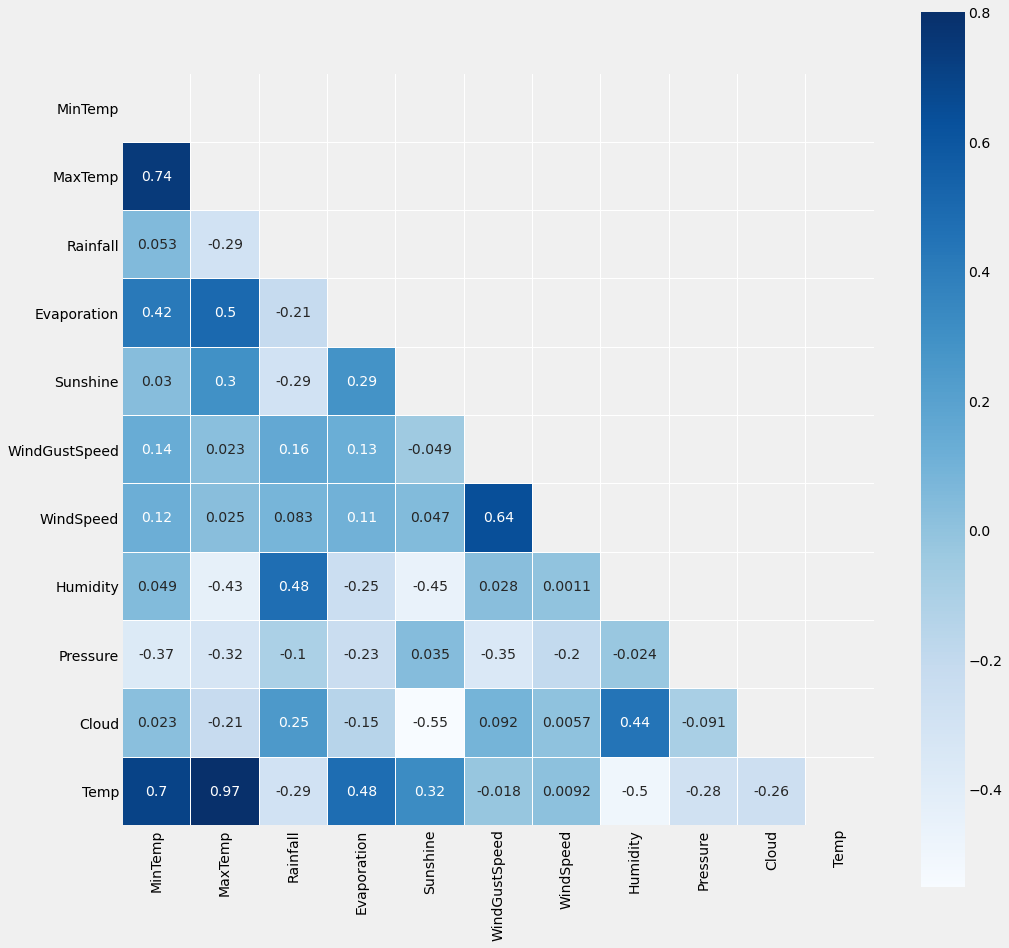

In [262]:
#Correlation Matrix with Seaborn Heatmap
corr= Weather2.corr(method="spearman")

mask = np.triu(Weather2.corr())

plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=0.8, linewidths=0.01,square=True,cmap='Blues',linecolor="white", annot=True, mask=mask)

In [263]:
#Section II - Build, tune, and evaluate models

##1. K-means Cluster Analysis
###Firstly, transform categorical features using dummies


categorical=[ 'WindGustDir','WindDir','RainToday', 'RainTomorrow']

for col in categorical:
    dummies=pd.get_dummies(Weather2[col], prefix=col)
    Weather2 = pd.concat([Weather2, dummies], axis=1)
    Weather2.drop(col, axis=1, inplace=True)


    
Weather2.head()



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,...,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,NorahHead,18.9,23.7,0.0,4.4,6.53058,41.0,28.0,55.0,1026.0,...,1,0,0,0,0,0,1,0,0,1
1,Nuriootpa,11.1,20.8,0.0,4.8,8.30000,39.0,26.0,48.0,1014.4,...,0,0,0,0,0,1,1,0,1,0
2,GoldCoast,15.9,19.5,17.6,4.4,6.53058,44.0,9.0,99.0,1028.5,...,0,0,1,0,0,0,0,1,0,1
3,Bendigo,0.0,14.9,0.0,4.4,6.53058,35.0,19.0,55.0,1023.0,...,0,0,0,0,1,0,1,0,0,1
4,Walpole,9.1,22.7,0.0,4.4,6.53058,41.0,7.0,40.0,1027.1,...,0,0,0,0,0,0,1,0,1,0


In [264]:

###Secondly, use MinMaxScaler to scale and give equal importance to all features

mms=MinMaxScaler()
columns_to_scale  = Weather2[['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure', 'Cloud','Temp']]

scaled=mms.fit_transform(columns_to_scale)
    
Weather_normalized = pd.DataFrame(scaled, columns=['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Cloud', 'Temp'])

Weather_normalized.head()

drop= ['Location','MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Cloud', 'Temp']

for col in drop:
    Weather2 = pd.concat([ Weather_normalized, Weather2], axis=1)
    Weather2.drop(col, axis=1, inplace=True)

Weather2.head()
Weather3 = Weather2.dropna()
#Since K-means doesn't work on categorical variables, Location is dropped, and the dataset includes all numeric variables and dummy variables.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
0,0.682741,0.544031,0.000000,0.056921,0.450385,0.265625,0.337349,0.545455,0.805601,0.646956,0.530693
1,0.484772,0.487280,0.000000,0.062096,0.572414,0.250000,0.313253,0.474747,0.614498,0.875000,0.473267
2,0.606599,0.461840,0.047439,0.056921,0.450385,0.289062,0.108434,0.989899,0.846787,0.646956,0.439604
3,0.203046,0.371820,0.000000,0.056921,0.450385,0.218750,0.228916,0.545455,0.756178,0.500000,0.368317
4,0.434010,0.524462,0.000000,0.056921,0.450385,0.265625,0.084337,0.393939,0.823723,0.646956,0.532673


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,...,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,0.682741,0.544031,0.000000,0.056921,0.450385,0.265625,0.337349,0.545455,0.805601,0.646956,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.484772,0.487280,0.000000,0.062096,0.572414,0.250000,0.313253,0.474747,0.614498,0.875000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.606599,0.461840,0.047439,0.056921,0.450385,0.289062,0.108434,0.989899,0.846787,0.646956,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.203046,0.371820,0.000000,0.056921,0.450385,0.218750,0.228916,0.545455,0.756178,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.434010,0.524462,0.000000,0.056921,0.450385,0.265625,0.084337,0.393939,0.823723,0.646956,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [150]:
kmeans = KMeans(  init="random", n_clusters=5, n_init=25, max_iter=100, random_state=6)
kmeans.fit(Weather3)
kmeans.__dict__.keys()
kmeans.labels_

KMeans(init='random', max_iter=100, n_clusters=5, n_init=25, random_state=6)

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'n_features_in_', '_n_threads', '_n_init', '_tol', '_algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

array([1, 4, 2, ..., 2, 0, 2])

Text(0.5, 0, 'k')

Text(0, 0.5, 'Sum_of_squared_distances')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

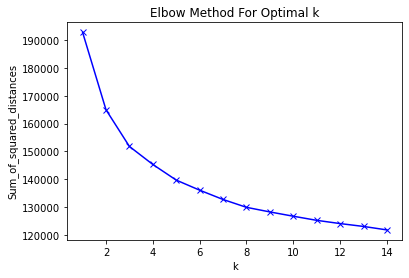

In [40]:
## Elbow method for optimal K
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Weather3)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#According to the Elbow Method, it is hard to distinguish the elbow (each K from 2-5 looks likely). Since the elbow is not clear, I proceed with the Silhouette method.

In [41]:
## The Silhouette Method for optimal K

from sklearn.metrics import silhouette_score

sil = []
kmax = 14

for k in range(2, kmax+1):
  km2 = KMeans(n_clusters = k).fit(Weather3)
  labels = km2.labels_
  sil.append(silhouette_score(Weather3, labels, metric = 'euclidean'))


([<matplotlib.axis.XTick at 0x230b9c3b970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Coefficient')

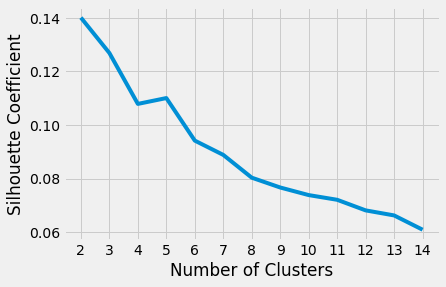

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), sil)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#The Silhouette coefficient shows that K=2 is optimal. 

In [165]:
kmeans = KMeans(  init="random", n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(Weather3)
kmeans.__dict__.keys()
kmeans.labels_

KMeans(init='random', max_iter=100, n_clusters=2, n_init=25, random_state=6)

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'n_features_in_', '_n_threads', '_n_init', '_tol', '_algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

array([1, 0, 1, ..., 1, 0, 1])

In [62]:
kmeans.inertia_
kmeans.n_iter_

164991.30416280957

5

In [ ]:
#Modeling Process & Interpretation: 

#K-means is an unsupervised machine learning algorithm.
#They key is to define K clusters such that total within-cluster variation is at the minimum level.
#Before modeling, the numeric variables are normalized using the MinMaxScaler.Categorical variables were transformed into dummies before this step.
#In the modeling process, I used the Elbow Method and the Silhouette Coefficient to determine the optimal K. 
#Since the elbow is not prominent enough, I used the global maximum for the Silhouette score to determin that K=2 is the optimal number of clusters.

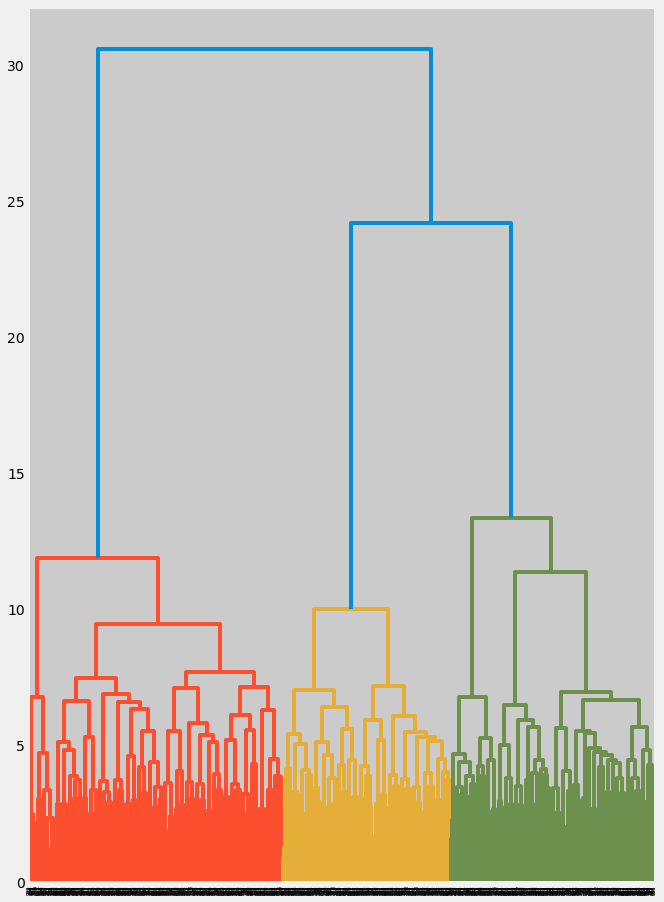

In [44]:
##2. Hierarchical Clustering(HAC)
fig, ax = plt.subplots(figsize=(10, 15))
Weather4=Weather3.loc[0:1000]
dendrogram = sch.dendrogram(sch.linkage(Weather4,method='ward'))
#Since the dataset is too big, and the memory doesn't allow dendrogram performance on the entire dataset, I had to subset to only 1000 rows for a showcase of the complexity. 

In [271]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet



Hcluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
features=['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure', 'Cloud','RainToday_Yes']
target=['RainTomorrow_Yes']
Weather4=Weather3.loc[0:10000]
X = Weather4[features]
y=  Weather4[target]
Hcluster.fit(X)
metrics.accuracy_score(y,Hcluster.labels_)

#The accuracy score is pretty low and the dataset had to be subset in order to be run. 

AgglomerativeClustering(n_clusters=3)

0.4494210847044485

In [45]:
##3. Decision Tree Classification
#Since the Decision Tree Method doesn't require scaling or dummies for categorical data, the imputation of missing data is the only step needed for data preparation. 
Weather_train = pd.read_csv("Weather Forecast Training.csv")
Weather_test=pd.read_csv("Weather Forecast Testing.csv")
Weather_train["Evaporation"] = median_imputer.fit_transform(Weather_train[["Evaporation"]]).ravel()
Weather_train["Sunshine"] = mean_imputer.fit_transform(Weather_train[["Sunshine"]]).ravel()
Weather_train["Cloud"] = mean_imputer.fit_transform(Weather_train[["Cloud"]]).ravel()
Weather_train["MinTemp"] = mean_imputer.fit_transform(Weather_train[["MinTemp"]]).ravel()
Weather_train["MaxTemp"] = mean_imputer.fit_transform(Weather_train[["MaxTemp"]]).ravel()
Weather_train["Rainfall"] = median_imputer.fit_transform(Weather_train[["Rainfall"]]).ravel()
Weather_train["WindSpeed"] = median_imputer.fit_transform(Weather_train[["WindSpeed"]]).ravel()
Weather_train["WindGustSpeed"] = median_imputer.fit_transform(Weather_train[["WindGustSpeed"]]).ravel()
Weather_train["Humidity"] = mean_imputer.fit_transform(Weather_train[["Humidity"]]).ravel()
Weather_train["Pressure"] = mean_imputer.fit_transform(Weather_train[["Pressure"]]).ravel()
Weather_train["Temp"] = mean_imputer.fit_transform(Weather_train[["Temp"]]).ravel()
Weather_train["WindGustDir"] = mode_imputer.fit_transform(Weather_train[["WindGustDir"]]).ravel()
Weather_train["WindDir"] = mode_imputer.fit_transform(Weather_train[["WindDir"]]).ravel()

Weather_train=Weather_train.dropna()

In [46]:


Weather_train['RainToday'] = Weather_train['RainToday'].map( {'Yes':1, 'No':0})
Weather_train['RainTomorrow'] = Weather_train['RainTomorrow'].map( {'Yes':1, 'No':0})


features=['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure', 'Cloud','Temp','RainToday']


X = Weather_train[features]
y = Weather_train.RainTomorrow

#Since the original test dataset is missing RainTomorrow, I am using the train dataset to do train_test_split of 70% VS 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.dropna()
y.dropna()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,18.9,23.7,0.0,4.4,6.53058,41.0,28.0,55.0,1026.0,5.175647,22.4,0
1,11.1,20.8,0.0,4.8,8.30000,39.0,26.0,48.0,1014.4,7.000000,19.5,0
2,15.9,19.5,17.6,4.4,6.53058,44.0,9.0,99.0,1028.5,5.175647,17.8,1
3,0.0,14.9,0.0,4.4,6.53058,35.0,19.0,55.0,1023.0,4.000000,14.2,0
4,9.1,22.7,0.0,4.4,6.53058,41.0,7.0,40.0,1027.1,5.175647,22.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51973,20.1,25.8,5.6,4.4,8.20000,28.0,13.0,72.0,1018.9,3.000000,24.7,1
51974,14.2,18.6,2.8,4.0,0.00000,41.0,20.0,52.0,1022.3,5.175647,17.2,1
51975,11.1,17.2,1.2,4.4,6.53058,31.0,11.0,92.0,1018.7,5.175647,12.9,1
51976,19.0,24.8,0.0,5.2,7.50000,39.0,17.0,65.0,1015.4,7.000000,23.4,0


0        1
1        0
2        1
3        1
4        0
        ..
51973    1
51974    1
51975    1
51976    0
51977    0
Name: RainTomorrow, Length: 51231, dtype: int64

In [47]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred



array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [293]:
from sklearn.metrics import accuracy_score

metrics.accuracy_score(y_test, y_pred,normalize=True, sample_weight=None)
#The 71.33% accuracy means the model is pretty good. Althought it is not excellent, but at least there shouldn't have been overfitting problem. 

0.7134027325959662

In [294]:
## Model Hyperparameter Fine Tuning

param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [295]:
## Output Best Model Hyperparameters

print(grid.best_score_)
for hps, values in grid.best_params_.items():
  print(f"{hps}: {values}")

0.7651486801427538
criterion: gini
max_depth: 5
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 2


In [296]:
clf_tuned = DecisionTreeClassifier(criterion="gini", max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2)

In [297]:
clf_tuned = clf_tuned.fit(X_train,y_train)
y_pred_tuned = clf_tuned.predict(X_test)
metrics.accuracy_score(y_test, y_pred_tuned,normalize=True, sample_weight=None)
#After tuning the hyperparameters, the model performance is improved. So far this is the best Decision Tree model. 

0.7566037735849057

In [53]:
## Evaluation of the best Decision Tree Model (ROC AUC)

from sklearn.metrics import roc_auc_score
roc_auc_score(y, clf_tuned.predict_proba(X)[:, 1])
#The score is close to 1, indicating a good classifier.


0.8390200621445967

[Text(1700.591351351351, 1871.1000000000001, 'X[7] <= 63.5\ngini = 0.5\nsamples = 35861\nvalue = [18318, 17543]'),
 Text(788.0789189189188, 1530.9, 'X[4] <= 6.45\ngini = 0.425\nsamples = 21692\nvalue = [15055, 6637]'),
 Text(331.82270270270266, 1190.7, 'X[8] <= 1015.45\ngini = 0.49\nsamples = 3199\nvalue = [1371, 1828]'),
 Text(165.91135135135133, 850.5, 'X[5] <= 45.0\ngini = 0.417\nsamples = 1816\nvalue = [539, 1277]'),
 Text(82.95567567567566, 510.3000000000002, 'gini = 0.482\nsamples = 817\nvalue = [332, 485]'),
 Text(248.867027027027, 510.3000000000002, 'gini = 0.329\nsamples = 999\nvalue = [207, 792]'),
 Text(497.734054054054, 850.5, 'X[5] <= 38.0\ngini = 0.479\nsamples = 1383\nvalue = [832, 551]'),
 Text(414.7783783783783, 510.3000000000002, 'gini = 0.419\nsamples = 726\nvalue = [509, 217]'),
 Text(580.6897297297296, 510.3000000000002, 'gini = 0.5\nsamples = 657\nvalue = [323, 334]'),
 Text(1244.335135135135, 1190.7, 'X[7] <= 52.5\ngini = 0.385\nsamples = 18493\nvalue = [13684, 4

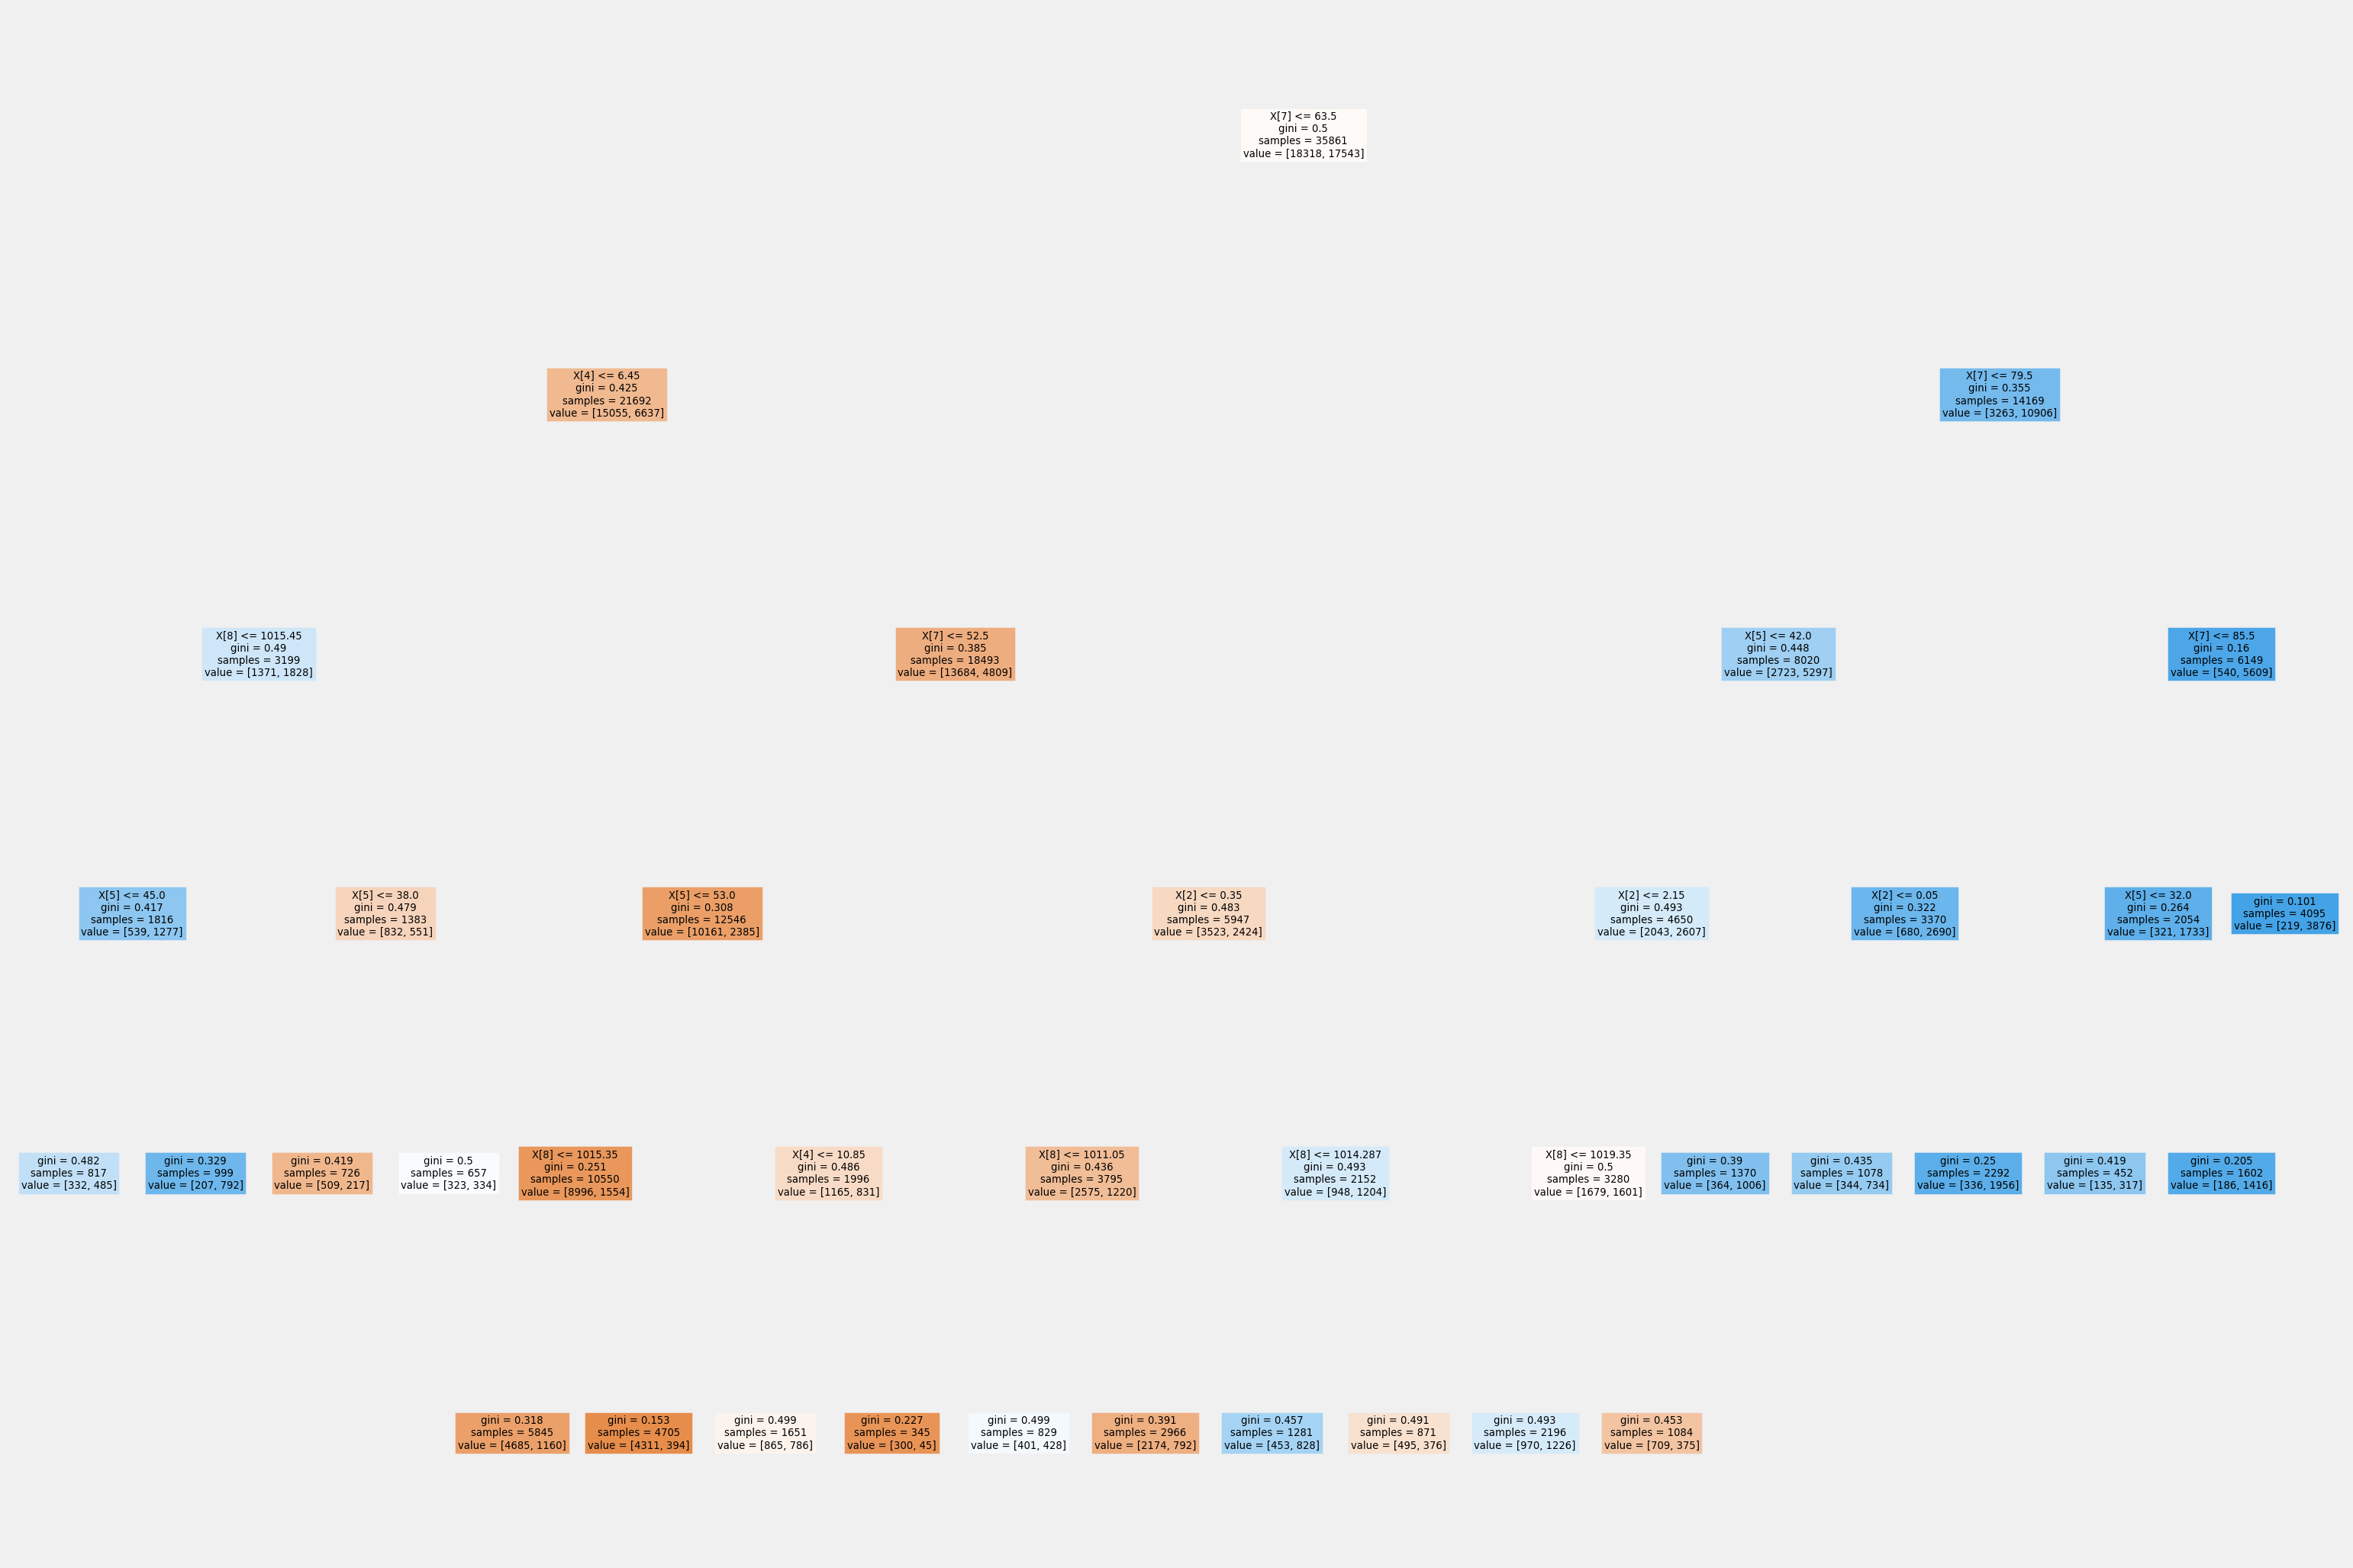

In [54]:
##Visualizing the Decision Tree

from sklearn import tree
fig = plt.figure(figsize=(49,35))
tree.plot_tree(clf_tuned,filled = True)

In [55]:
#Modeling Process & Interpretation：
#For the Decision Tree Model, I started from running the model with the Entrophy criterion, and used all the numeric variables as the selected features. I did so because intuitively, Wind Gust Direction and Wind Direction are specific to each location. Each location have distinctive geological location and we are not considering them in this case. So I ommited the categorical variables regarding directions in this model. 

#After running the initial model, I fine-tuned the hyperparameters, aka. Criterion (metric for impurity), Max Depth (the maximum number of children nodes that can grow out from the decision tree until the tree is cut off), Max Leaf Nodes(minimum number of samples required to split an internal node), Min Samples Leaf (maximum number of leaves), and Min Samples Split(minimum number of samples required to be in the leaf node). These hyperparameters determine what kind of tree could be grown out of the model. Fine-tuning using these hyperparameters using sklearn led to the model that would be comparably the best for the selected features and target variable. 

#Using the fine-tuned hyperparameters, I ran the model again and got an improvement in accuracy for arounnd 5%. Since the accuracy is around 76%, which is less than 80%, overfitting problem is unlikely to exist. Otherwise, cross validation might be needed. 

#For further evaluation, I added the Roc-Auc curve score, a performance measurement for the classification that represents the degree or measure of separability. A higher score (close to 1) indicates that the model is capable of distinguishing between classes.The ROC AUC score is approximately 0.84, indicating that the model is pretty good. 

In [56]:
## 4.Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
pd.DataFrame(X).applymap(lambda x: abs(x))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.997072,0.165882,0.330577,0.145683,0.000860,0.055441,0.984747,0.112207,1.697646,0.001302,0.225240,0.664334
1,0.228198,0.242487,0.330577,0.014952,0.617891,0.196965,0.764033,0.436798,0.019696,0.883913,0.196646,0.664334
2,0.525814,0.425549,1.268039,0.145683,0.000860,0.156845,1.112040,1.928079,2.059273,0.001302,0.443959,1.505266
3,1.971852,1.073306,0.330577,0.145683,0.000860,0.480013,0.008468,0.112207,1.263693,0.567469,0.967679,0.664334
4,0.542370,0.025065,0.330577,0.145683,0.000860,0.055441,1.332754,0.807759,1.856762,0.001302,0.239788,0.664334
...,...,...,...,...,...,...,...,...,...,...,...,...
51226,1.185575,0.461597,0.178074,0.145683,0.582922,0.975347,0.670611,0.676086,0.670625,1.051263,0.559839,1.505266
51227,0.258768,0.552284,0.076252,0.276414,2.284548,0.055441,0.101889,0.251317,1.162438,0.001302,0.531246,1.505266
51228,0.228198,0.749427,0.221580,0.145683,0.000860,0.763061,0.891325,1.603488,0.641695,0.001302,1.156801,1.505266
51229,1.012780,0.320780,0.330577,0.115779,0.338138,0.196965,0.229182,0.351495,0.164347,0.883913,0.370718,0.664334


In [57]:
Weather_train.isna().sum().sum()
Weather_train.duplicated().sum()
X = Weather_train.iloc[:, :-1].select_dtypes('number')
y = Weather_train.iloc[:, -1]
X.shape
y.shape
type(y)

0

17

(51231, 12)

(51231,)

pandas.core.series.Series

In [58]:
bnb = BernoulliNB()
bnb_pred = bnb.fit(X_train,y_train).predict(X_test)
bnb_pred
metrics.accuracy_score(y_test, bnb_pred)
#The accuracy score is slightly higher than the tuned Decision Tree Model 

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

0.6825634352635003

In [59]:
#Modeling Process & Interpretation: 
#Naive Bayes is a classification algorithm that is based on the Bayes Theorem and applied to binary and multi-class classification problems. For this binary model, the BeroulliNB algorithm is used, and all features are incorporated to predict RainTomorrow.
#The resulting accuracy score is 68.26%. It is the accuracy surrounding the probability of the target variable belonging to a given class. The accuracy is higher than the best Decision Tree Model determined in the previous steps.  
#The advantages of NB method includes low computational cost, high efficiency, and high accuracy. The main disadvantage is that the model needs to assume features to be completely independent, which is hard to achieve. 

In [272]:
#Section III - Prediction and Interpretation 

##1. Prepare the second dataset for prediction
Weather_forecast = pd.read_csv("Weather Forecast Testing.csv")
Weather_forecast["Evaporation"] = median_imputer.fit_transform(Weather_forecast[["Evaporation"]]).ravel()
Weather_forecast["Sunshine"] = mean_imputer.fit_transform(Weather_forecast[["Sunshine"]]).ravel()
Weather_forecast["Cloud"] = mean_imputer.fit_transform(Weather_forecast[["Cloud"]]).ravel()
Weather_forecast["MinTemp"] = mean_imputer.fit_transform(Weather_forecast[["MinTemp"]]).ravel()
Weather_forecast["MaxTemp"] = mean_imputer.fit_transform(Weather_forecast[["MaxTemp"]]).ravel()
Weather_forecast["Rainfall"] = median_imputer.fit_transform(Weather_forecast[["Rainfall"]]).ravel()
Weather_forecast["WindGustSpeed"] = median_imputer.fit_transform(Weather_forecast[["WindGustSpeed"]]).ravel()
Weather_forecast["WindSpeed"] = median_imputer.fit_transform(Weather_forecast[["WindSpeed"]]).ravel()
Weather_forecast["Humidity"] = mean_imputer.fit_transform(Weather_forecast[["Humidity"]]).ravel()
Weather_forecast["Pressure"] = mean_imputer.fit_transform(Weather_forecast[["Pressure"]]).ravel()
Weather_forecast["Temp"] = mean_imputer.fit_transform(Weather_forecast[["Temp"]]).ravel()
Weather_forecast["WindGustDir"] = mode_imputer.fit_transform(Weather_forecast[["WindGustDir"]]).ravel()
Weather_forecast["WindDir"] = mode_imputer.fit_transform(Weather_forecast[["WindDir"]]).ravel()

Weather_forecast.head()
Weather_forecast2 = Weather_forecast.dropna()

,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,1,Perth,15.3,21.5,4.4,2.4,1.400000,NW,70.0,W,22.0,69.0,997.6,7.0,19.8,Yes
1,2,Portland,7.1,11.0,38.8,1.2,5.800000,SSE,48.0,SW,19.0,46.0,1014.0,4.0,10.7,Yes
2,3,Hobart,3.6,16.6,0.2,2.8,9.300000,NW,37.0,N,15.0,48.0,1016.6,5.0,15.4,No
3,4,Woomera,17.6,37.4,0.0,34.0,6.577928,NNW,37.0,NW,19.0,11.0,1010.4,2.0,34.6,No
4,5,Townsville,11.4,25.6,0.0,6.0,2.800000,ESE,31.0,SSE,13.0,52.0,1016.4,7.0,24.3,No


In [273]:
categorical_forecast=[ 'WindGustDir','WindDir','RainToday']
for col in categorical_forecast:
    dummies=pd.get_dummies(Weather_forecast2[col], prefix=col)
    Weather_forecast2 = pd.concat([Weather_forecast2, dummies], axis=1)
    Weather_forecast2.drop(col, axis=1, inplace=True)


    
Weather_forecast2.head()


,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,...,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW,RainToday_No,RainToday_Yes
0,1,Perth,15.3,21.5,4.4,2.4,1.400000,70.0,22.0,69.0,...,0,0,0,0,0,1,0,0,0,1
1,2,Portland,7.1,11.0,38.8,1.2,5.800000,48.0,19.0,46.0,...,0,0,0,0,1,0,0,0,0,1
2,3,Hobart,3.6,16.6,0.2,2.8,9.300000,37.0,15.0,48.0,...,0,0,0,0,0,0,0,0,1,0
3,4,Woomera,17.6,37.4,0.0,34.0,6.577928,37.0,19.0,11.0,...,0,0,0,0,0,0,0,0,1,0
4,5,Townsville,11.4,25.6,0.0,6.0,2.800000,31.0,13.0,52.0,...,0,0,1,0,0,0,0,0,1,0


In [274]:
mms=MinMaxScaler()
columns_to_scale_forecast  = Weather_forecast2[['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure', 'Cloud','Temp']]

scaled_forecast = mms.fit_transform(columns_to_scale_forecast)


    
Weather_normalized_forecast = pd.DataFrame(scaled_forecast, columns= ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Cloud', 'Temp'])





In [275]:
drop_forecast= ['Location','MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Cloud', 'Temp']

for col in drop_forecast:
    Weather_forecast2 = pd.concat([Weather_normalized_forecast, Weather_forecast2], axis=1)
    Weather_forecast2.drop(col, axis=1, inplace=True)

Weather_forecast2.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,...,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW,RainToday_No,RainToday_Yes
0,0.602210,0.498024,0.011970,0.027842,0.100000,0.572727,0.252874,0.686869,0.305263,0.875,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.375691,0.290514,0.105550,0.013921,0.414286,0.372727,0.218391,0.454545,0.592982,0.500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.279006,0.401186,0.000544,0.032483,0.664286,0.272727,0.172414,0.474747,0.638596,0.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.665746,0.812253,0.000000,0.394432,0.469852,0.272727,0.218391,0.101010,0.529825,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.494475,0.579051,0.000000,0.069606,0.200000,0.218182,0.149425,0.515152,0.635088,0.875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [276]:
Weather_forecast2=Weather_forecast2.dropna()
Weather_forecast2.isna().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
                ..
WindDir_W        0
WindDir_WNW      0
WindDir_WSW      0
RainToday_No     0
RainToday_Yes    0
Length: 90, dtype: int64

In [277]:
##2. Use K-means for prediction

#Use the previsous determined optimal Kmeans function and apply it to the dummified and scaled new dataset
features2=['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure', 'Cloud','RainToday_No','RainToday_Yes']

kmeans = KMeans(  init="random", n_clusters=2, n_init=25, max_iter=100, random_state=6)
X = Weather_forecast2[features2]

kmeans.fit(X)
kmeans.__dict__.keys()
kmeans.labels_
forecasts = kmeans.predict(X)
kmeans_forecast = pd.DataFrame(forecasts)
kmeans_forecast
kmeans_forecast.to_csv(r'C:\Users\XILUJ\Desktop\CISC520\Weather\Kmeans_forecast.csv', index = False)



KMeans(init='random', max_iter=100, n_clusters=2, n_init=25, random_state=6)

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'n_features_in_', '_n_threads', '_n_init', '_tol', '_algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

array([1, 1, 0, ..., 0, 1, 1])

,0
0,1
1,1
2,0
3,0
4,0
...,...
12670,0
12671,0
12672,0
12673,1


Text(0.5, 1.0, 'Dendrogram')

Text(0.5, 0, 'Cluster Size')

Text(0, 0.5, 'Euclidean distances')

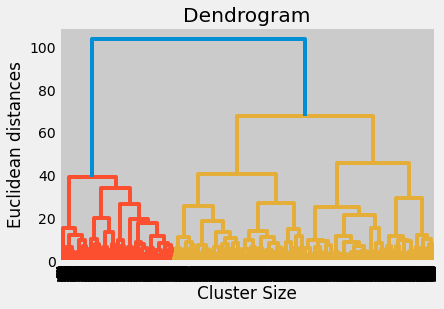

In [278]:
##3. Use HAC for Prediction

dendrogram_forecast = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Euclidean distances')
plt.show()

In [281]:
Hcluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
Hcluster.fit(X)
Hcluster_forecasts= pd.DataFrame(Hcluster.labels_)

AgglomerativeClustering()

In [301]:
Hcluster_forecasts
Hcluster_forecasts.to_csv(r'C:\Users\XILUJ\Desktop\CISC520\Weather\Hcluster_forecast.csv', index = False)

,0
0,1
1,1
2,0
3,0
4,0
...,...
12670,0
12671,0
12672,0
12673,1


In [314]:
##4. Use Decison Tree for prediction
features=['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure', 'Cloud','Temp','RainToday']
Weather_forecast3=Weather_forecast[features]
Weather_forecast4=Weather_forecast3.dropna()
Weather_forecast4.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833 entries, 0 to 12993
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        12833 non-null  float64
 1   MaxTemp        12833 non-null  float64
 2   Rainfall       12833 non-null  float64
 3   Evaporation    12833 non-null  float64
 4   Sunshine       12833 non-null  float64
 5   WindGustSpeed  12833 non-null  float64
 6   WindSpeed      12833 non-null  float64
 7   Humidity       12833 non-null  float64
 8   Pressure       12833 non-null  float64
 9   Cloud          12833 non-null  float64
 10  Temp           12833 non-null  float64
 11  RainToday      12833 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB


In [313]:
y_pred_tuned = clf_tuned.predict(Weather_forecast4)
DT_forecast=pd.DataFrame(y_pred_tuned)
DT_forecast

,0
0,1
1,1
2,0
3,0
4,0
...,...
12828,0
12829,0
12830,1
12831,0


In [316]:
DT_forecast.to_csv(r'C:\Users\XILUJ\Desktop\CISC520\Weather\DT_forecast.csv', index = False)

In [ ]:
#In summary, this machine learning exercise used K-means and Hierarchical Clustering, as well as Decision Tree and Naive Baynes Classifiers to predict whether it rains tomorrow. The dataset is large and the output is binary. The purpose is clear, so rather than using unsupervised learning to find patterns, I suggest using supervised learning methods. Among the later, Decision Tree is the most recommended method in my opinion. It needs less normalization and data preparation, and the fine tuning of hyperparameters really digs into the modeling algorithm to find the best combinations. The prediction is efficient, and the accuracy score is reliable.
#The predictions will be uploaded in a separate csv file for comparison. 